In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report


In [3]:
df = pd.read_csv('heart_disease_data.csv')

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,target
0,63,1,1,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,3,130,250,0,1,187,0,3.5,0,0,2,0,1
2,41,0,2,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,2,120,236,0,1,178,0,0.8,2,0,2,0,1
4,57,0,4,120,354,0,0,163,1,0.6,2,0,2,1,0


In [4]:
# Check for nulls
print(df.isnull().sum())

# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
smoking     0
target      0
dtype: int64


In [5]:
model = SVC(kernel='rbf')  # you can try 'linear', 'poly', 'sigmoid' too
model.fit(X_train, y_train)


SVC()

C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nites\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.50      0.67         2

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



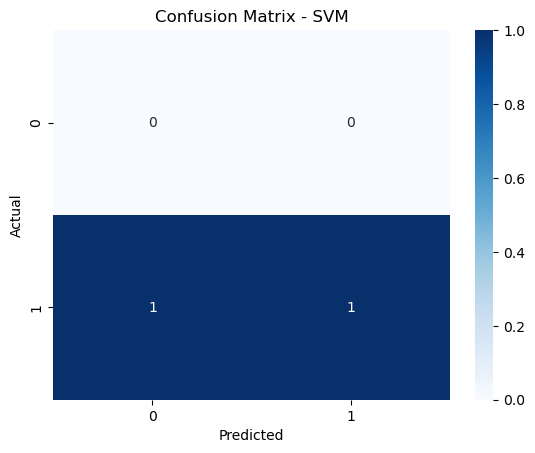

In [6]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()


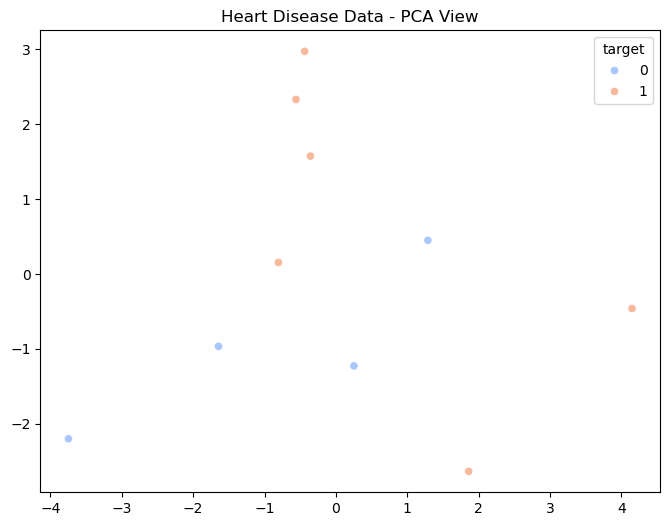

In [7]:
# PCA to reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

X_train_pca, X_test_pca = train_test_split(X_pca, test_size=0.2, random_state=42)
model_pca = SVC(kernel='rbf')
model_pca.fit(X_train_pca, y_train)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm')
plt.title("Heart Disease Data - PCA View")
plt.show()


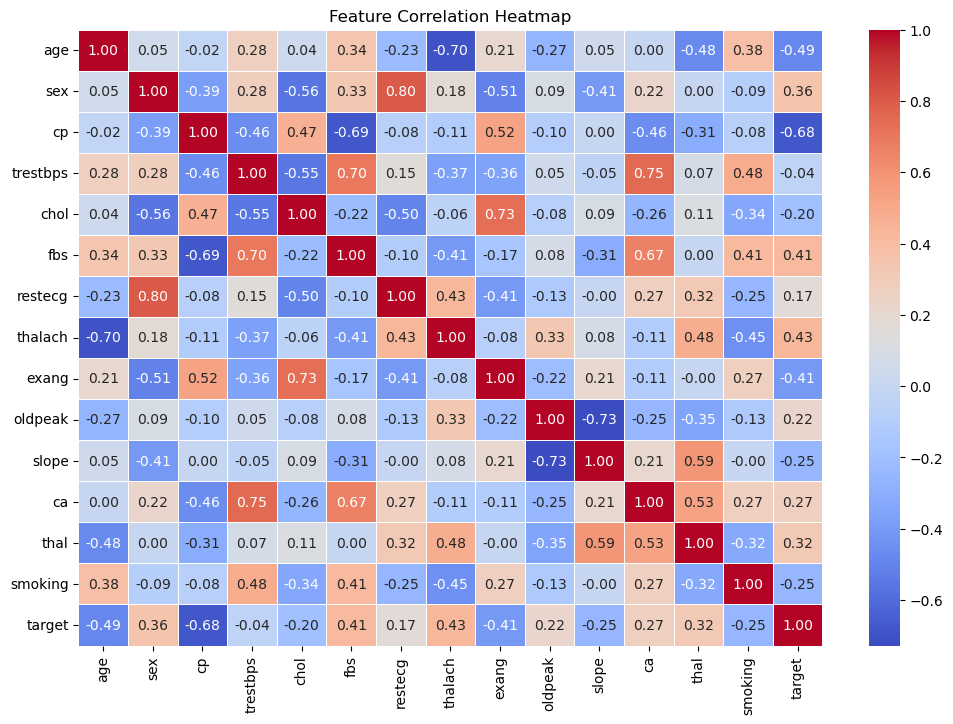

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


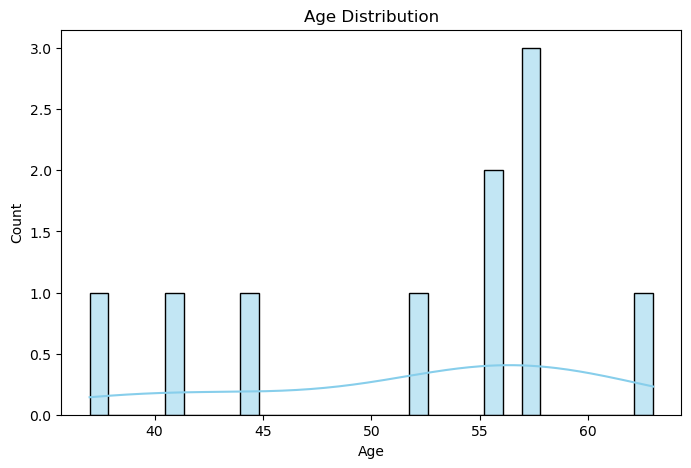

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=30, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\nites\AppData\Local\Temp\ipykernel_21996\1863138364.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


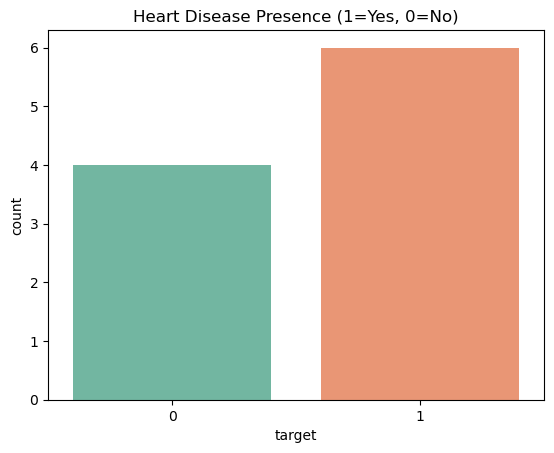

In [10]:
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Heart Disease Presence (1=Yes, 0=No)")
plt.show()


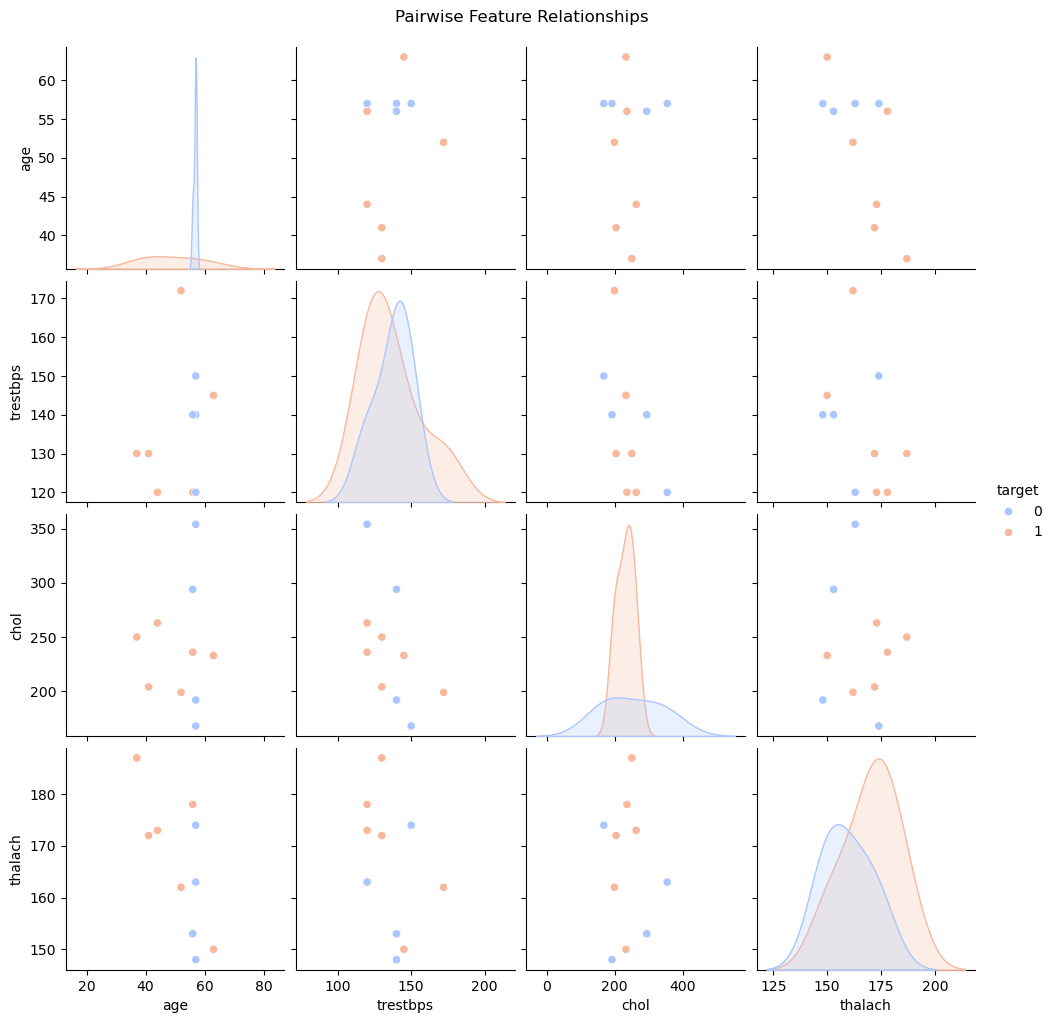

In [11]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='coolwarm')
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()
